In [42]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv(r"C:\Users\Nitro\Desktop\Python\Practical\titanic.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [47]:
df.isnull().sum().sort_values(ascending=False)
#checking the null values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [48]:
# As the data shows missing values in Age, Cabin, and Embarked. We will:
# 1. Drop the Cabin column as it has too many missing values.
# 2. Fill the missing values in Age with the median age.
# 3. Fill the missing values in Embarked with the mode of the column.
# Dropping the Cabin column if it exists
if 'Cabin' in df.columns:
	df.drop(columns=['Cabin'], inplace=True)
# Filling missing values in Age with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Filling missing values in Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Checking if there are any missing values left
df.isnull().sum().sort_values(ascending=False)
#Encoding categorical variables 

C:\Users\Nitro\AppData\Local\Temp\ipykernel_836\2145135169.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Nitro\AppData\Local\Temp\ipykernel_836\2145135169.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [49]:
#Median is used for numerical data to handle skewness and outliers.
#Mode is used for categorical data to preserve the most common category. This approach ensures that the dataset remains as representative and unbiased as possible after handling missing values.

In [50]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df.drop_duplicates(inplace=True)
df.info()

Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [51]:
# Example: Removing outliers using the IQR method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Example: Scaling Age and Fare columns
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [53]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Embarked', 'Sex'], drop_first=True)

In [54]:
# Example: Create a new feature for family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Example: Create a new feature for whether the passenger was alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [55]:
# Example: Drop PassengerId and Name columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [56]:
# Convert data types if necessary
df['Pclass'] = df['Pclass'].astype('category')

In [57]:
print(df.isnull().sum())

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Sex_male      0
FamilySize    0
IsAlone       0
dtype: int64


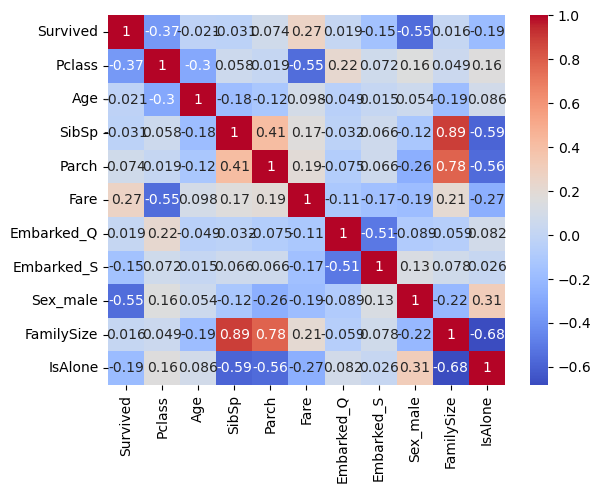

In [58]:
# Example: Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

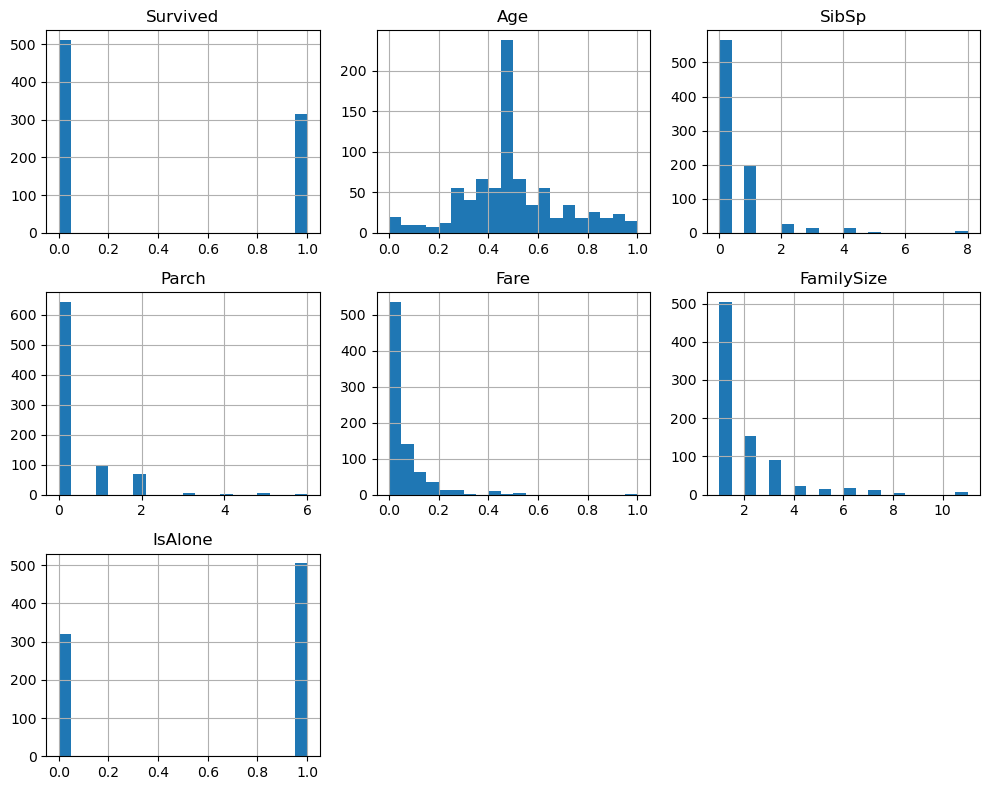

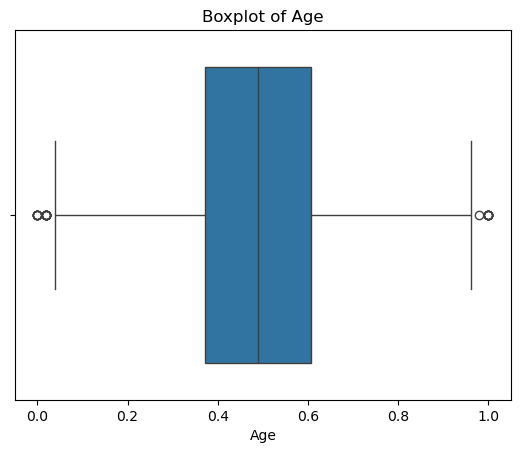

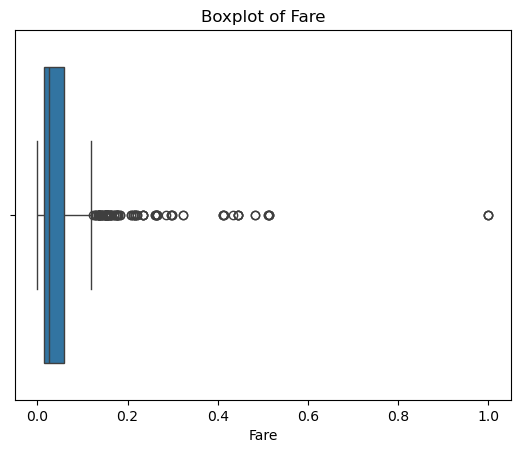

In [59]:
# Histograms for numerical columns
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplots to identify outliers
for column in ['Age', 'Fare']:
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

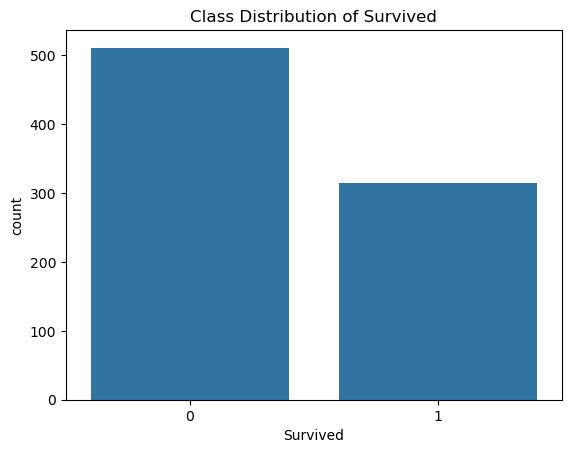

In [60]:
# Check class distribution
sns.countplot(data=df, x='Survived')
plt.title('Class Distribution of Survived')
plt.show()

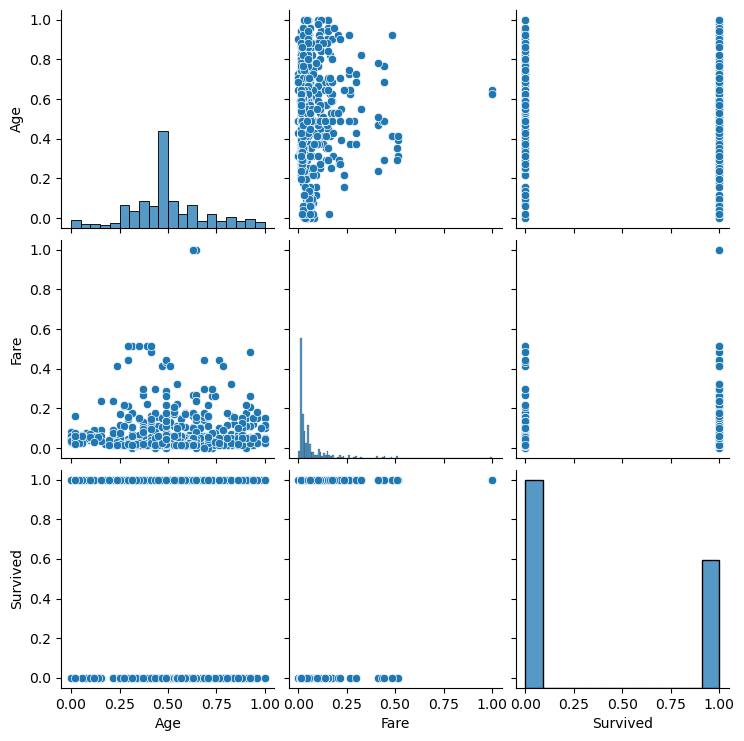

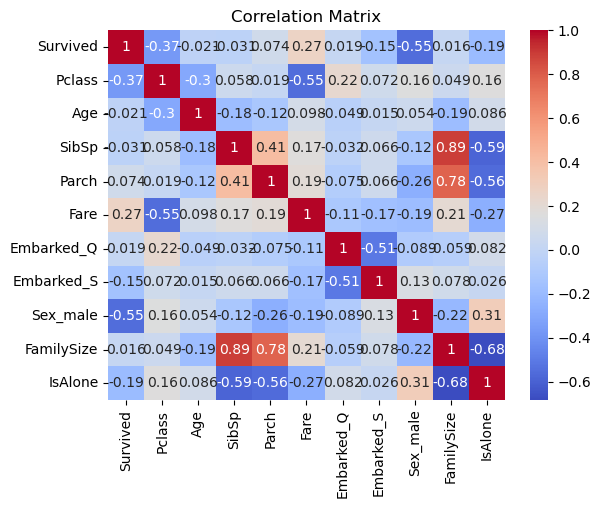

In [61]:
# Pair plot for numerical features
sns.pairplot(df[['Age', 'Fare', 'Survived']])
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Example: Capping outliers in Fare
upper_limit = df['Fare'].quantile(0.95)
df['Fare'] = np.where(df['Fare'] > upper_limit, upper_limit, df['Fare'])

In [63]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [64]:
# Example: Create a feature for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Senior'])

# Example: Create a feature for fare bins
df['FareGroup'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

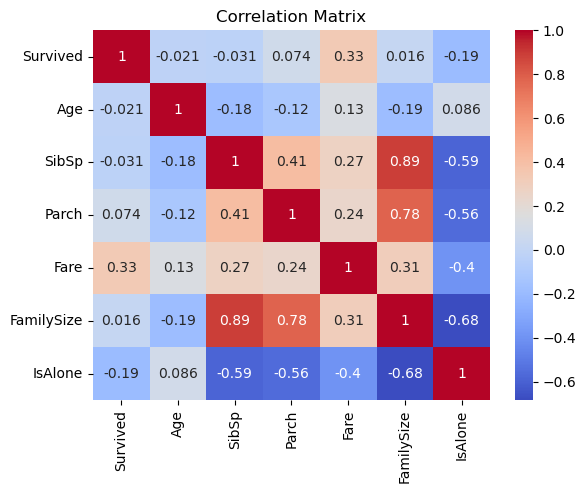

In [65]:
# Check for multicollinearity
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [67]:
# Example: Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'Child'

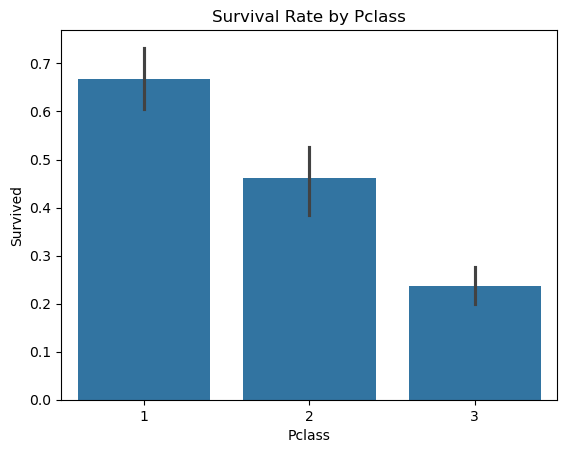

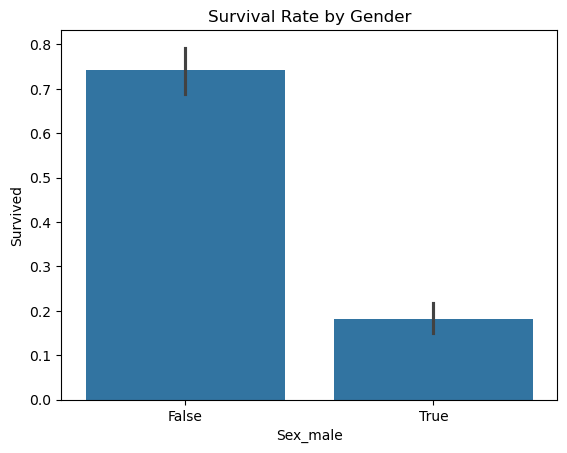

In [66]:
# Example: Survival rate by Pclass
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Pclass')
plt.show()

# Example: Survival rate by Sex
sns.barplot(data=df, x='Sex_male', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

In [ ]:
#Visualize distributions and outliers using histograms and boxplots.
#Analyze relationships between variables using scatter plots, pair plots, and correlation heatmaps.
#Handle outliers and scale numerical features.
#Perform feature engineering to create new, meaningful features.
#Analyze categorical variables and check for class imbalance.

In [ ]:
#Conclusion
#The dataset appears well-prepared for most purposes, but you can add more features or perform additional checks based on your specific goals. If you're using it for machine learning, consider feature importance and class balance. If it's for analysis, ensure all relevant insights are captured.   
#This code provides a comprehensive approach to data preprocessing, including handling missing values, encoding categorical variables, scaling numerical features, and feature engineering. It also includes data visualization techniques to explore the dataset and identify relationships between variables.
#The final dataset is ready for further analysis or modeling.